In [77]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import scipy
from sklearn import preprocessing
import os
from sklearn.metrics import mean_squared_error 
import matplotlib as mpl
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2
np.set_printoptions(precision=7)

In [78]:
basepath = './'
for entry in os.listdir(basepath):
    if os.path.isdir(os.path.join(basepath, entry)):
        print(entry)

.ipynb_checkpoints
subject 1
subject 2


In [79]:
for f_name in os.listdir('./'):
       if f_name.endswith('.txt'):
            print(f_name)

In [80]:
files2=[]
for subdir, dirs, files in os.walk(r'./'):
    for filename in files:
        if filename.endswith(".txt"):
            #if ((filename[8] == '0') & (filename[9] == '0')):
               # if filename.startswith("P"):
                #print(filename)
                files2.append(os.path.abspath(os.path.join(subdir, filename)))
for filename in files2:
    print (filename)

C:\Aaloo\HCT Data\subject 1\0\1 Card-5 T5.txt
C:\Aaloo\HCT Data\subject 1\0\2 Card-4 T5.txt
C:\Aaloo\HCT Data\subject 1\0\3 Card-7 T5.txt
C:\Aaloo\HCT Data\subject 1\30\1 Card-12 T5.txt
C:\Aaloo\HCT Data\subject 1\30\2 Card-11 T5.txt
C:\Aaloo\HCT Data\subject 1\30\3 Card-10 T5.txt
C:\Aaloo\HCT Data\subject 1\50\1 Card-55 T4.txt
C:\Aaloo\HCT Data\subject 1\50\2 Card-54 T4.txt
C:\Aaloo\HCT Data\subject 1\50\3 Card-51 T4.txt
C:\Aaloo\HCT Data\subject 1\70\1 Card-50 T4.txt
C:\Aaloo\HCT Data\subject 1\70\2 Card-47 T4.txt
C:\Aaloo\HCT Data\subject 1\70\3 Card-46 T4.txt
C:\Aaloo\HCT Data\subject 2\0\1.txt
C:\Aaloo\HCT Data\subject 2\0\2.txt
C:\Aaloo\HCT Data\subject 2\0\3.txt
C:\Aaloo\HCT Data\subject 2\30\1.txt
C:\Aaloo\HCT Data\subject 2\30\2.txt
C:\Aaloo\HCT Data\subject 2\30\3.txt
C:\Aaloo\HCT Data\subject 2\50\1.txt
C:\Aaloo\HCT Data\subject 2\50\2.txt
C:\Aaloo\HCT Data\subject 2\50\3.txt
C:\Aaloo\HCT Data\subject 2\70\1.txt
C:\Aaloo\HCT Data\subject 2\70\2.txt
C:\Aaloo\HCT Data\subject 

Parameters:  [ 1.0626027 10.2425408  0.023183 ]
Std Dev:  [0.0049229 0.0803301 0.0013747]
Mean square error:  0.0001828


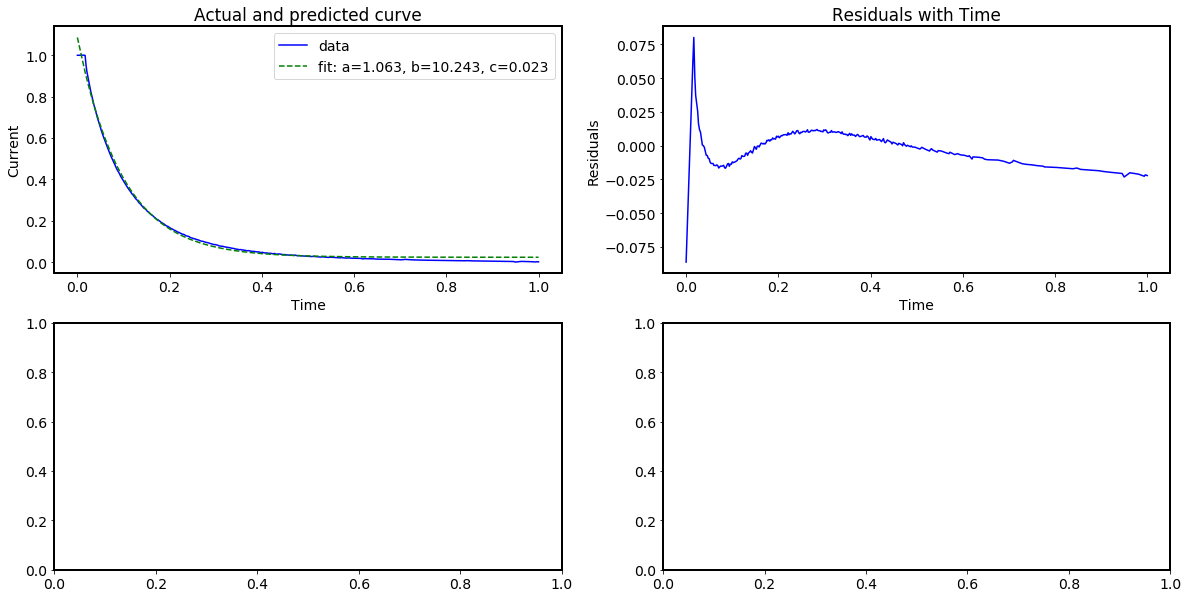

,current,time,X,Y,Z
0,0.999479,0.000000,0.000000,0.0,0.0
1,1.000000,0.014533,0.014614,0.0,0.0
2,0.998959,0.016698,0.016701,0.0,0.0
3,0.950026,0.018862,0.018789,0.0,0.0
4,0.919833,0.020717,0.020877,0.0,0.0


In [81]:
df = pd.read_csv(files2[2], sep="\t", names=['current','time','X','Y','Z'])
df2 = df.drop_duplicates(subset=["current"], keep='last')
df2 = df2.reset_index(drop=True)
x = df2.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df3 = pd.DataFrame(x_scaled)
df3.columns = df2.columns
xdata= df3["time"].to_numpy()
ydata= df3["current"].to_numpy()
xdata1 = xdata.astype(np.float64)
ydata1 = ydata.astype(np.float64)
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x = xdata1
y = ydata1
popt, pcov = curve_fit(func, xdata1, ydata1)
stdevs = np.sqrt(np.diag(pcov))
res = ydata1 - func(xdata1, *popt)

print("Parameters: ", popt)
print("Std Dev: ", stdevs)
print ("Mean square error: ", '%.7f' % mean_squared_error(ydata1,func(xdata1, *popt)) )
fig,ax =  plt.subplots(2,2, figsize=(20, 10))
ax[0,0].plot(xdata1, ydata1, 'b-', label='data')
ax[0,0].plot(xdata1, func(xdata1, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
ax[0,0].set(xlabel='Time',ylabel='Current')
ax[0,0].set_title("Actual and predicted curve")
ax[0,0].legend()

ax[0,1].plot(xdata1, res, 'b-', label='data')
ax[0,1].set(xlabel='Time',ylabel='Residuals')
ax[0,1].set_title("Residuals with Time")
plt.show()
(df3.head())

Without regularization:
Parameters:  [ 1.0626081 10.242646   0.0231861]
Mean square error:  0.0001828

With regularization:
Parameters:  [ 1.0588164 10.1429937  0.022059 ]
Mean square error:  0.0001838


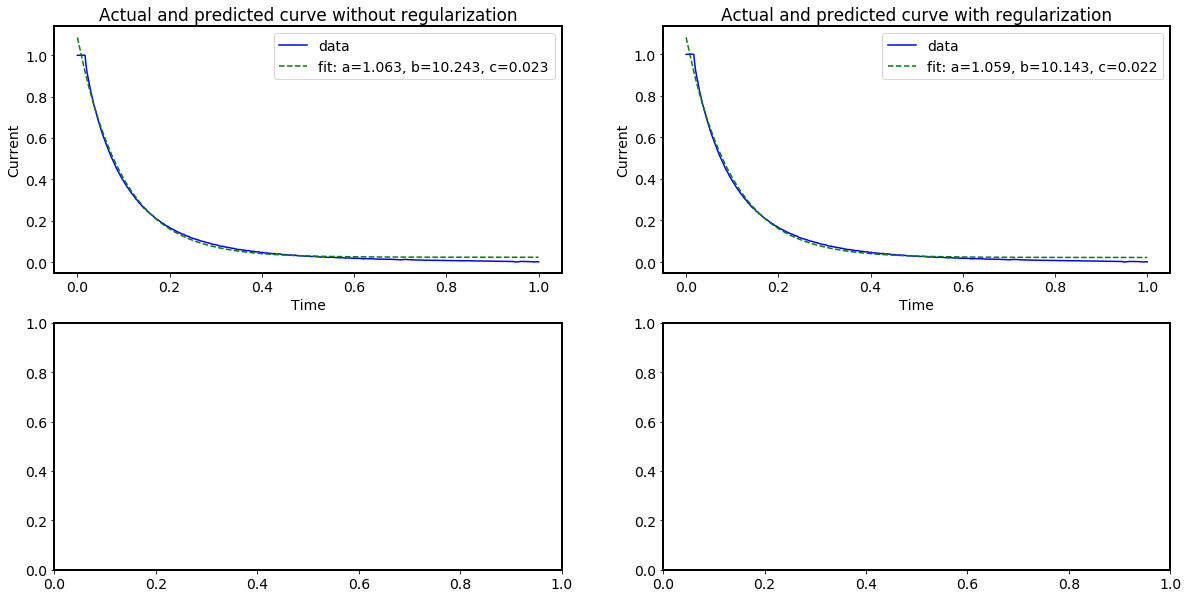

In [82]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

def cost(params):  # simply use globally defined x and y
    a,b,c = params
    model = func(x, a, b, c)
    return np.mean((model - y)**2)  # quadratic cost function

def cost2(params):
    a,b,c = params
    model = func(x, a,b,c)
    reg = a**2 + b**2 + c**2  # very simple: higher parameters -> higher cost
    regweight = 1e-6  # determines relative importance of regularization vs goodness of fit
    return np.mean((model - y)**2)  + reg * regweight

p0 = [0, 0, 0]  # initial guess for lambda, mu, and sigma
res = scipy.optimize.minimize(cost, p0)
#print(res)  # see if minimization succeeded.
a,b,c = res.x
print("Without regularization:")
print("Parameters: ", res.x)
print ("Mean square error: ", '%.7f' % mean_squared_error(ydata1,(func(x, a, b, c))))
fig,ax =  plt.subplots(2,2, figsize=(20, 10))
ax[0,0].plot(xdata1, ydata1, 'b-', label='data')
ax[0,0].plot(xdata1, (func(x, a, b, c)), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(res.x))
ax[0,0].set(xlabel='Time',ylabel='Current')
ax[0,0].set_title("Actual and predicted curve without regularization")
ax[0,0].legend()

print()

print("With regularization:")
p0 = [0, 0, 0]  # initial guess for lambda, mu, and sigma
res = scipy.optimize.minimize(cost2, p0)
#print(res)  # see if minimization succeeded.
a,b,c = res.x
print("Parameters: ", res.x)
print ("Mean square error: ",'%.7f' % mean_squared_error(ydata1,(func(x, a, b, c))) )
ax[0,1].plot(xdata1, ydata1, 'b-', label='data')
ax[0,1].plot(xdata1, (func(x, a, b, c)), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(res.x))
ax[0,1].set(xlabel='Time',ylabel='Current')
ax[0,1].set_title("Actual and predicted curve with regularization")
ax[0,1].legend()
plt.show()